# Hackathon Cajamar - Reto Atmira Stock - Notebook de exploración
Autores: Daniel Corral Ruiz, Antonio Pascual Hernández, Diego Senso González.

# Objetivo
El objetivo del presente notebook es realizar una primera exploración y análisis descriptivo de los datos, así como realizar la ingeniería de variables necesaria para preparar los datos y trabajar con ellos en el notebook de predicción.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Hackathon-Cajamar---Reto-Atmira-Stock---Notebook-de-exploración" data-toc-modified-id="Hackathon-Cajamar---Reto-Atmira-Stock---Notebook-de-exploración-1">Hackathon Cajamar - Reto Atmira Stock - Notebook de exploración</a></span></li><li><span><a href="#Objetivo" data-toc-modified-id="Objetivo-2">Objetivo</a></span><ul class="toc-item"><li><span><a href="#Librerías-y-paquetes" data-toc-modified-id="Librerías-y-paquetes-2.1">Librerías y paquetes</a></span></li><li><span><a href="#Dataset" data-toc-modified-id="Dataset-2.2">Dataset</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3">EDA</a></span><ul class="toc-item"><li><span><a href="#Observación-inicial" data-toc-modified-id="Observación-inicial-3.1">Observación inicial</a></span></li><li><span><a href="#Análisis-de-variables-categóricas" data-toc-modified-id="Análisis-de-variables-categóricas-3.2">Análisis de variables categóricas</a></span></li><li><span><a href="#Análisis-de-variables-numéricas" data-toc-modified-id="Análisis-de-variables-numéricas-3.3">Análisis de variables numéricas</a></span></li></ul></li><li><span><a href="#Comparativa-de-datasets" data-toc-modified-id="Comparativa-de-datasets-4">Comparativa de datasets</a></span><ul class="toc-item"><li><span><a href="#Conclusiones-del-Análisis-Exploratorio-y-comparación-entre-datasets" data-toc-modified-id="Conclusiones-del-Análisis-Exploratorio-y-comparación-entre-datasets-4.1">Conclusiones del Análisis Exploratorio y comparación entre datasets</a></span></li></ul></li><li><span><a href="#Ingeniería-de-variables" data-toc-modified-id="Ingeniería-de-variables-5">Ingeniería de variables</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Cambio-de-tipo-de-variables" data-toc-modified-id="Cambio-de-tipo-de-variables-5.0.1">Cambio de tipo de variables</a></span></li><li><span><a href="#Tratamiento-del-valor-&quot;Rotura&quot;-en-la-variable-de-estado" data-toc-modified-id="Tratamiento-del-valor-&quot;Rotura&quot;-en-la-variable-de-estado-5.0.2">Tratamiento del valor "Rotura" en la variable de estado</a></span></li><li><span><a href="#Tratamiento-de-la-variable-precio" data-toc-modified-id="Tratamiento-de-la-variable-precio-5.0.3">Tratamiento de la variable precio</a></span></li><li><span><a href="#Tratamiento-de-la-variable-antiguedad" data-toc-modified-id="Tratamiento-de-la-variable-antiguedad-5.0.4">Tratamiento de la variable antiguedad</a></span></li><li><span><a href="#Tratamiento-de-la-variable-visitas" data-toc-modified-id="Tratamiento-de-la-variable-visitas-5.0.5">Tratamiento de la variable visitas</a></span></li><li><span><a href="#Tratamiento-de-los-NAs-de-categoria_dos" data-toc-modified-id="Tratamiento-de-los-NAs-de-categoria_dos-5.0.6">Tratamiento de los NAs de categoria_dos</a></span></li><li><span><a href="#Generación-de-nuevas-variables" data-toc-modified-id="Generación-de-nuevas-variables-5.0.7">Generación de nuevas variables</a></span></li><li><span><a href="#Generación-de-variables-por-grupo" data-toc-modified-id="Generación-de-variables-por-grupo-5.0.8">Generación de variables por grupo</a></span></li><li><span><a href="#Generación-de-variables-binarias" data-toc-modified-id="Generación-de-variables-binarias-5.0.9">Generación de variables binarias</a></span></li><li><span><a href="#Generación-de-Lags" data-toc-modified-id="Generación-de-Lags-5.0.10">Generación de Lags</a></span></li></ul></li></ul></li><li><span><a href="#Exportación-del-dataset" data-toc-modified-id="Exportación-del-dataset-6">Exportación del dataset</a></span></li></ul></div>

## Librerías y paquetes

In [1]:
#Carga de paquetes necesarios para el estudio.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler
from kneed import DataGenerator, KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn import preprocessing
import pandas_profiling as pdp

## Dataset

El dataset que se utilizará para modelar y entrenar los modelos representa los datos de ventas de diferentes productos de PcComponentes en diferentes días. En total, cuenta con 4045022 observaciones y 11 variables:

- **fecha**: el día al que pertenecen los datos.
- **id**: el identificador del producto.
- **visitas**: cantidad de visitas que usuarios han hecho a ese producto en la página web.
- **categoria_uno**: categoría principal a la que pertenece el producto.
- **categoria_dos**: categoría secundaria a la que pertenece el producto.
- **estado**: si el producto se encuenta en stock (No rotura), no está disponible (Rotura), o pendiente de entrega inminente (Tránsito).
- **precio**: precio de compra del producto.
- **dia_atipico**: si se trata de un día de alta demanda (valor = 1), baja demanda (valor = -1), o normal (valor = 0).
- **campaña**: si el producto se encuentra en campaña promocional (valor = 1), o no (valor = 0).
- **antiguedad**: número de días que lleva el producto en el catálogo.
- **unidades_vendidas**: la cantidad de unidades que se han vendido para cada producto y día.

Una vez explicado el diccionario de variables, se procede a **cargar los datos**. En diferentes momentos se han cargado los datos de estimar y modelar respectivamente, pues era necesario que ambos conjjuntos de datos se procesaran con el mismo parseado de cara a entrenar y probar los modelos.

In [3]:
#Carga y observación de datos
data = pd.read_csv('../data/Modelar_UH2021.txt', sep = '|', parse_dates = [0], decimal = ",")
predecir = pd.read_csv('../data/Estimar2.txt', sep = '|', parse_dates = [0], decimal = ",")
data

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,fecha,id,visitas,categoria_uno,categoria_dos,estado,precio,dia_atipico,campaña,antiguedad,unidades_vendidas
0,2015-01-06,21972,0,C,75.0,No Rotura,NaN,0,0,5241.0,0
1,2015-01-06,23910,5,C,170.0,No Rotura,6.07,0,0,5241.0,3
2,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
3,2015-01-06,24306,13,A,46.0,No Rotura,NaN,0,0,NaN,0
4,2015-01-06,27144,15,E,230.0,No Rotura,NaN,0,0,4064.0,0
...,...,...,...,...,...,...,...,...,...,...,...
4045017,2016-09-30,457416,1395,F,336.0,No Rotura,50.38,0,0,130.0,9
4045018,2016-09-30,457422,1080,F,336.0,Rotura,NaN,0,0,130.0,0
4045019,2016-09-30,458650,1385,K,340.0,No Rotura,NaN,0,0,126.0,0
4045020,2016-09-30,458660,1915,K,340.0,No Rotura,68.49,0,0,126.0,24


# EDA

Para realizar el **EDA (Análisis Exploratorio)**, en primer lugar se procede a una observación inicial a fin de hacerse una idea de las dimensiones del dataset con el que se está trabajando.

## Observación inicial

In [4]:
#Tipo de los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4045022 entries, 0 to 4045021
Data columns (total 11 columns):
 #   Column             Dtype         
---  ------             -----         
 0   fecha              datetime64[ns]
 1   id                 int64         
 2   visitas            int64         
 3   categoria_uno      object        
 4   categoria_dos      float64       
 5   estado             object        
 6   precio             float64       
 7   dia_atipico        int64         
 8   campaña            int64         
 9   antiguedad         float64       
 10  unidades_vendidas  int64         
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 339.5+ MB


In [5]:
#Número de observaciones y de variables
data.shape

(4045022, 11)

Tras una primera vista al número de filas y columnas, se procede a eliminar los posibles **registros duplicados**, que sin duda alterarían el estudio al ser información repetida e innecesaria.

In [6]:
#Eliminación de registros duplicados
data = data.drop_duplicates()

Se procede ahora a revisar el procentaje de **valores NA** de cada variable.

In [7]:
#Porcentaje de valores NA de cada variable
percentage_NaN = data.apply(lambda x:sum(x.isna()/len(data)))
percentage_NaN.sort_values(ascending = False).head(15)

precio               0.686206
antiguedad           0.235689
categoria_dos        0.002153
fecha                0.000000
id                   0.000000
visitas              0.000000
categoria_uno        0.000000
estado               0.000000
dia_atipico          0.000000
campaña              0.000000
unidades_vendidas    0.000000
dtype: float64

A juzgar por los resultados, la variable **precio** cuenta con más de un 68% de valores ausentes. Posteriormente se deberá tratar adecuadamente a fin de utilizarla en el estudio. Se continúa el EDA, primero analizando las siete **variables categóricas** (esto, es variables que cuentan con un número limitado de resultados posibles) y después las cuatro **variables numéricas** (representadas por un número).

## Análisis de variables categóricas

Se desea saber el número de productos diferentes con los que se trabaja.

In [9]:
#Número de registros (a la derecha) por cada producto (a la izquierda).
data['id'].value_counts()

260338    1008
312102     980
360016     974
91226      509
229774     508
          ... 
95808      487
43640      487
256528     487
321264     487
429358     487
Name: id, Length: 4168, dtype: int64

Ahora, se estudian cuáles son las categorías más populares de productos. La **categoría A** es claramente con la que más productos cuenta.

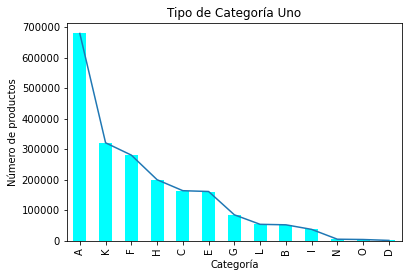

In [10]:
#Gráfico de barras del número de productos por cada categoría uno.
(data['categoria_uno'].value_counts()).plot()
(data['categoria_uno'].value_counts()).plot(kind = "bar", color = "cyan")

plt.title('Tipo de Categoría Uno')
plt.xlabel('Categoría') 
plt.ylabel('Número de productos');

A continuación, el estudio de la **categoría secundaria** del producto. En este caso, hay muchos más resultado únicos que para el caso de la primera categoría.

In [11]:
# Número de productos (derecha) por cada categoría dos (izquierda).
data['categoria_dos'].value_counts()

336.0    189679
340.0    159882
307.0    126451
82.0     125092
7.0      120872
          ...  
96.0        487
95.0        487
308.0       487
315.0       487
133.0       487
Name: categoria_dos, Length: 182, dtype: int64

Ahora se pasa a adquirir una idea de otras variables. La mayoría de productos están en estado de **"No Rotura"**, es decir, se encuentran en stock. 

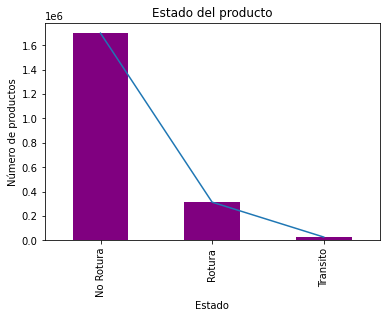

In [12]:
#Gráfico de barras del número de productos por cada uno de los tres estados del stock.
(data['estado'].value_counts()).plot()
(data['estado'].value_counts()).plot(kind = "bar", color = "purple") #Creación de un gráfico(plot) de tipo barras.

plt.title('Estado del producto') #Título del gráfico
plt.xlabel('Estado') #Título del eje X
plt.ylabel('Número de productos'); #Título del eje Y

La mayoría de días, lógicamente, hay una **demanda normal**. Sin embargo, son superiores claramente los días identificados como **alta demanda** con respecto a en los que la **demanda es baja**.

In [13]:
#Número de días de alta demanda (1) y baja (-1).
data['dia_atipico'].value_counts()

 0    1760471
 1     208659
-1      70907
Name: dia_atipico, dtype: int64

Son algo más de **9000 observaciones** en las que (por producto y día) se está en **campaña**.

In [14]:
#Número de días en los que hay algún producto que se encuentran en campaña.
data['campaña'].value_counts()

0    2030891
1       9146
Name: campaña, dtype: int64

Y son **48 los días diferentes** que se consideran día atípico:

In [15]:
#Número de días atípicos diferentes.
f0 = data['dia_atipico'] == 1
len(data[f0]['fecha'].value_counts())

48

A continuación, se observar el **número de observaciones** con las que se cuenta **para cada una de las fecha**, a fin de observar datos que salgan fuera de lo normal.

In [16]:
#Número de registros por fecha.
data[f0]['fecha'].value_counts()

2015-11-26    4776
2015-11-22    4773
2015-11-23    4771
2015-11-25    4769
2015-11-24    4766
2015-11-21    4728
2015-11-20    4635
2016-05-07    4617
2016-06-07    4616
2016-07-07    4616
2016-03-07    4595
2015-08-07    4589
2015-07-07    4589
2016-02-07    4528
2015-06-07    4515
2015-11-19    4507
2016-04-07    4448
2016-01-07    4425
2015-04-07    4324
2015-05-07    4283
2015-09-07    4172
2015-12-13    4171
2015-12-29    4171
2015-12-18    4171
2015-12-23    4171
2016-03-01    4171
2015-12-26    4171
2015-12-19    4171
2016-04-01    4171
2015-12-12    4171
2015-12-15    4171
2015-10-12    4171
2015-12-27    4171
2015-11-12    4171
2015-12-17    4171
2015-12-24    4171
2015-12-31    4171
2015-12-14    4171
2015-12-21    4171
2015-12-28    4171
2015-12-16    4171
2016-05-01    4171
2015-02-07    4171
2015-12-30    4171
2016-02-01    4171
2015-03-07    4171
2015-12-20    4171
2015-12-22    4171
Name: fecha, dtype: int64

In [71]:
#Número de registros por producto.
data['id'].value_counts()

260338    1008
312102     898
91226      509
235850     508
214272     508
          ... 
277144       8
315472       7
293364       4
305662       3
329300       3
Name: id, Length: 4016, dtype: int64

In [73]:
#Número de registros por fecha.
predecir['id'].value_counts()

121802    92
213192    92
235850    92
215248    92
121586    92
          ..
346346     1
314138     1
350248     1
313190     1
375850     1
Name: id, Length: 2736, dtype: int64

Y ahora, el número de productos que se encuentran en campaña para cada una de las fechas:

In [17]:
#Número de productos en campaña por cada fecha.
f0 = data['campaña'] == 1
data[f0]['fecha'].value_counts()

2015-11-22    643
2015-11-26    617
2015-11-25    610
2015-11-23    601
2015-11-24    595
2015-11-21    594
2015-11-20    495
2016-05-07    457
2016-07-07    456
2016-06-07    456
2016-04-07    452
2016-03-07    424
2015-08-07    421
2015-07-07    421
2015-11-19    357
2016-02-07    357
2015-06-07    349
2016-01-07    254
2015-11-18    186
2015-04-07    153
2016-06-30    124
2015-05-07    113
2015-09-07      4
2016-07-14      1
2016-07-13      1
2016-12-07      1
2016-08-07      1
2016-11-07      1
2016-09-07      1
2016-10-07      1
Name: fecha, dtype: int64

Tras esto, se procede a un análisis pormenorizado de las variables numéricas.

## Análisis de variables numéricas

Se seleccionan las variables numéricas, que son cuatro, y se procede a su estudio.

In [166]:
#Selección de aquellas variables numéricas del dataset.
numeric = data.loc[:,['precio','visitas', 'antiguedad', 'unidades_vendidas']]

Una primera vista de las **principales métricas**:

In [167]:
#Observación de las principales medidas de estas variables.
round(numeric.describe(), 1)

,precio,visitas,antiguedad,unidades_vendidas
count,640151.0,2040037.0,1559222.0,2040037.0
mean,31.2,124.4,1073.8,3.7
std,23.9,594.8,787.2,19.4
min,3.6,0.0,126.0,0.0
25%,13.7,5.0,524.0,0.0
50%,22.2,23.0,831.0,0.0
75%,42.8,85.0,1359.0,3.0
max,175.8,120045.0,5310.0,4881.0


Y los gráficos de caja, para visualizar los **valores atípicos u outliers**:

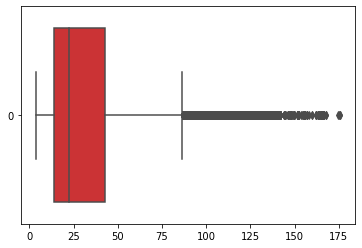

In [171]:
#Boxplot de 'precio'.
ax = sns.boxplot(data=numeric['precio'], orient="h", palette="Set1")

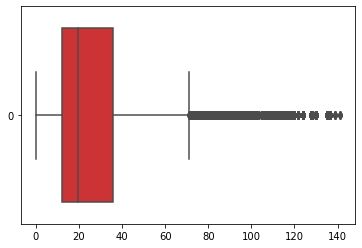

In [8]:
# #Boxplot de 'precio' predecir.
ax = sns.boxplot(data=predecir['precio'], orient="h", palette="Set1")

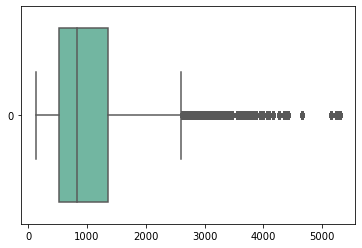

In [21]:
# Boxplot de 'antiguedad'.
ax = sns.boxplot(data=numeric['antiguedad'], orient="h", palette="Set2")

Se puede observar una **considerable cantidad de valores superiores al tercer cuartil** en la dos variables estudiadas. A continuación, siguiendo con un análisis similar, es de interés estudiar cómo se distribuyen los valores de las columnas numéricas existentes. Esto se hace por medio de **histogramas**.

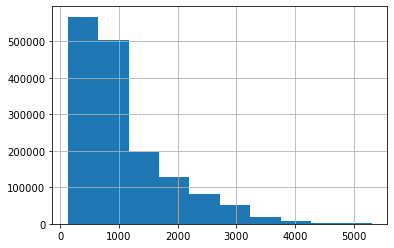

In [13]:
#Histograma de 'antiguedad'.
data['antiguedad'].hist();

<AxesSubplot:>

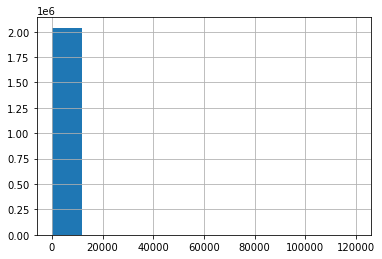

In [14]:
#Histograma de 'visitas'.
data['visitas'].hist();

Se observa como la gran parte de los datos en encuentran con menos de 150.000 visitas, sin embargo, si encontramos productos con mayor cantidad de visitas pero son insignificantes para la gráfica mostrada.

<AxesSubplot:>

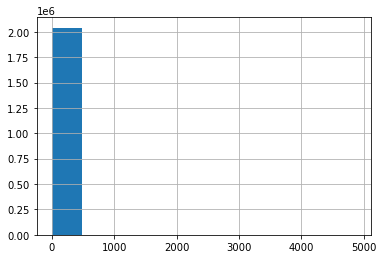

In [15]:
#Histograma de 'unidades_vendidas'.
data['unidades_vendidas'].hist();

Por último, se analiza la **correlación**. Especialmente, salta a la vista la **alta correlación negativa entre la antiguedad de productos (medida en días que lleva el producto en catálogo) y el precio**. También se observar una cierta relación negativa entre la **antiguedad del producto en el catálogo y las visitas de este**, aunque en este caso no es tan significativa como en el caso anterior. En ambos casos, los resultados tienen sentido, pues parece lógico que un producto cuantos más días lleve en catálogo, menor cantidad de visitas tendrá y su precio tiende también a decrecer.

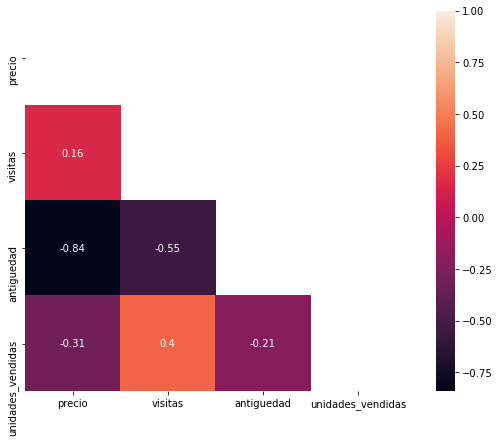

In [27]:
#Gráfico de la correlación.
corr = numeric.corr()

mask= np.zeros_like(corr.corr())
mask[np.triu_indices_from(mask)]=True
f, ax = plt.subplots(figsize=(11, 7))
sns.heatmap(corr.corr(),annot=True, mask=mask, vmax=1, square=True);

# Comparativa de datasets

Se comparan los dos datasets ya tratados de cara a estudiar la similaridad entre ellos. Esto será fundamental a la hora de intentar predecir los datos de un dataset a través de las observaciones del otro, así como a la hora d eescoger el mejor modelo e hiperparámetros.

In [9]:
Report_modelar = pdp.ProfileReport(data, title = 'Data Modelar', minimal = True)
Report_modelar

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
Report_estimar = pdp.ProfileReport(predecir, title = 'Data Modelar', minimal = True)
Report_estimar

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [148]:
data['categoria_dos'].value_counts()/len(data)

336.0    0.077945
340.0    0.068982
82.0     0.062777
307.0    0.056610
7.0      0.051032
           ...   
212.0    0.000182
133.0    0.000179
275.0    0.000176
268.0    0.000173
269.0    0.000144
Name: categoria_dos, Length: 183, dtype: float64

In [149]:
predecir['categoria_dos'].value_counts()/len(predecir)

82     0.058786
7      0.046058
340    0.039518
46     0.035491
304    0.033067
         ...   
136    0.000099
5      0.000075
37     0.000047
285    0.000014
316    0.000005
Name: categoria_dos, Length: 263, dtype: float64

## Conclusiones del Análisis Exploratorio y comparación entre datasets

De la **comparación entre ambos conjuntos de datos**, se pueden extraer los siguientes hechos significativos:

 - Las métricas de la variable **visitas** difieren en gran medida entre los dos datasets. Concretamente, medidas como la media, mediana o desviación típica difieren considerablemente entre sí. Adicionalmente, en un caso la variables está distribuida en unidades y en el otro caso en rangos de cinco en cinco.
 - En las dummies creadas que representan si un día es de **baja, alta o demanda normal**, se han encontrado diferencias en cuanto a la cantidad de días de alta demanda y de demanda normal en los conjuntos de datos.
 - En cuanto al **stock**, en el dataset de modelar existe aproximadamente un **82% de productos en "No Rotura"**, mientras que en los datos para predecir, este procentaje se eleva hasta casi el 99%. Del mismo modo, en el primer dataset hay **más del 16% de observaciones en "Rotura"** mientras que en el segundo no había ni un solo registro que atendiese a esta característica.

# Ingeniería de variables

Tras el análisis de los datos, se procede a realizar el proceso de ingeniería de variables a finde 

### Cambio de tipo de variables

In [192]:
#Cambio de dos variables a formato texto.
data['id'] = data['id'].astype(str)
data['categoria_dos'] = data['categoria_dos'].astype(str)

### Tratamiento del valor "Rotura" en la variable de estado
Dada la inexistencia de observaciones con el valor "Rotura" en la variable de estado en el dataset para predecir, se ha decidido prescindir de estas observaciones en el dataset de modelar.

In [193]:
f0 = data['estado'] != 'Rotura'
data = data[f0]

### Tratamiento de la variable precio

In [194]:
# Completar los NA en precio con el precio del mismo producto el día anterior.
data['precio'] = data.groupby(['id'])['precio'].ffill()

In [195]:
#Se eliminan aquellos registros que tenían NA en el precio y no tienen ningún registro de precio anterior en fecha.
data = data.dropna(subset=['precio'])

In [159]:
#Filtro para eliminar valores extremos en el precio.
f0 = data['precio'] < 90
data = data[f0]

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


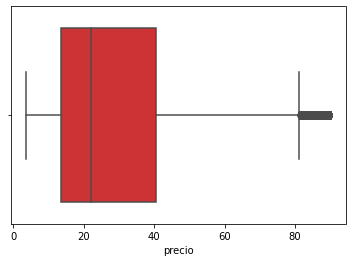

In [160]:
# Boxplot de 'precio'.
ax = sns.boxplot(data['precio'], orient="h", palette="Set1")

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


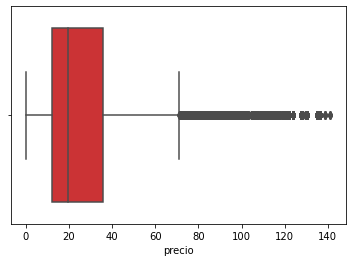

In [161]:
# #Boxplot de 'precio' predecir.
ax = sns.boxplot(predecir['precio'], orient="h", palette="Set1")

### Tratamiento de la variable antiguedad

In [196]:
#Reemplazamiento del símbolo '-' por ceros para que no ofrezca problemas en el tratamiento ulterior.
data = data.replace('-', '0')

In [197]:
#Conversión de la columna "antiguedad" a numérico, ya que el el dataset para estimar no tenía este formato.
data['antiguedad'] = pd.to_numeric(data['antiguedad'])

In [198]:
#Seleccionamos la media de antiguedad por cada categoría_dos.
antiguedad = data.groupby('categoria_dos').antiguedad.mean()

In [199]:
#A los productos con antiguedad NA, se le asigna la media de la antiguedad de su misma categoría_dos.
data['antiguedad'] = data['antiguedad'].fillna(data.groupby('categoria_dos')['antiguedad'].transform('mean'))

In [200]:
#A los productos que con antiguedad NA y donde no hay más registros de antiguedad de su categoría_dos, se le asigna
#la media de antiguedad de los productos de la misma categoría_uno.
data['antiguedad'] = data['antiguedad'].fillna(data.groupby('categoria_uno')['antiguedad'].transform('mean'))

### Tratamiento de la variable visitas

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


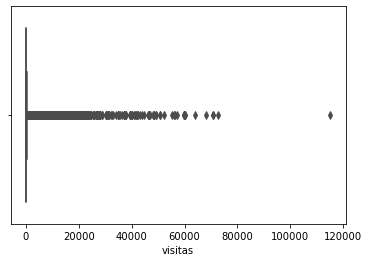

In [167]:
# Boxplot de 'precio'.
ax = sns.boxplot(data['visitas'], orient="h", palette="Set1")

C:\Users\diego\anaconda3\envs\gradiente\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


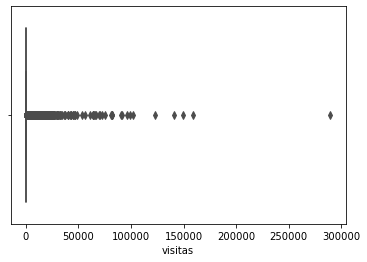

In [168]:
ax = sns.boxplot(predecir['visitas'], orient="h", palette="Set1")

In [169]:
def myround(x, base=5):
    return base * round(x/base)

In [170]:
data['visitas'] = myround(data['visitas'])

In [171]:
data['visitas'].value_counts()

5.0        160125
0.0        134879
10.0       121184
15.0        93529
20.0        75506
            ...  
11075.0         1
12780.0         1
6190.0          1
9475.0          1
59690.0         1
Name: visitas, Length: 2252, dtype: int64

### Tratamiento de los NAs de categoria_dos

In [201]:
#Número de NAs de la variable 'categoria_dos'
data.categoria_dos.isna().sum()

0

In [202]:
#Porcentaje de valores NA final
percentage_NaN = data.apply(lambda x:sum(x.isna()/len(data)))
percentage_NaN.sort_values(ascending = False).head(60)

fecha            0.0
id               0.0
visitas          0.0
categoria_uno    0.0
categoria_dos    0.0
estado           0.0
precio           0.0
dia_atipico      0.0
campaña          0.0
antiguedad       0.0
dtype: float64

### Generación de nuevas variables

In [203]:
#Generación de nueva variable, que tendrá el valor de 1 cuando un día sea de alta demanda y haya campaña.
f0 = data['dia_atipico'] == 1
f1 = data['campaña'] == 1
data['atipico_campaña'] = 0
data['atipico_campaña'][f0 & f1] = 1
data['atipico_campaña'].value_counts()

<ipython-input-203-d0daccad9488>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['atipico_campaña'][f0 & f1] = 1


0    209874
1      2967
Name: atipico_campaña, dtype: int64

In [204]:
#Extracción del día para crear una nueva columna.
data['fecha'] = data['fecha'].astype(str)
dia = map(lambda x: x.split('-')[-1], data.fecha)
dia = list(dia)
data['dia'] = dia
data['dia'] = pd.to_numeric(data['dia'])

In [205]:
#Creación de nueva columna de valores 0 y 1 dependiendo de la variable día.
data.loc[data['dia'] >= 25, 'cobro'] = 1
data.loc[data['dia'] <= 5, 'cobro'] = 1
data['cobro'].fillna(0, inplace = True)

In [206]:
#Eliminación de columnas sobrantes.
data.drop(['dia'], axis = 'columns', inplace = True)

### Generación de variables por grupo

In [207]:
#Pruebas de generación de medias por grupos en función de id, categoria_uno, categoria_dos, dia_atipico.
# data['precio_mediano_categ1'] = data.groupby('categoria_uno')['precio'].transform('median')
# data['precio_mediano_categ2'] = data.groupby('categoria_dos')['precio'].transform('median')
# data['visitas_mediano_categ1'] = data.groupby('categoria_uno')['visitas'].transform('median')
# data['visitas_mediano_categ2'] = data.groupby('categoria_dos')['visitas'].transform('median')
# data['antiguedad_mediano_categ1'] = data.groupby('categoria_uno')['antiguedad'].transform('median')
# data['antiguedad_mediano_categ2'] = data.groupby('categoria_dos')['antiguedad'].transform('median')

# data['precio_id'] = data.groupby('id')['precio'].transform('median')
# data['visitas_id'] = data.groupby('id')['visitas'].transform('median')
# data['antiguedad_id'] = data.groupby('id')['antiguedad'].transform('median')

# data['precio_dia_atipico_id'] = data.groupby(['dia_atipico','id'])['precio'].transform('median')
# data['visitas_dia_atipico_id'] = data.groupby(['dia_atipico','id'])['visitas'].transform('median')
# data['antiguedad_dia_atipico_id'] = data.groupby(['dia_atipico','id'])['antiguedad'].transform('median')

# data['precio_dia_atipico_categ1'] = data.groupby(['dia_atipico','categoria_uno'])['precio'].transform('median')
# data['visitas_dia_atipico_categ1'] = data.groupby(['dia_atipico','categoria_uno'])['visitas'].transform('median')
# data['antiguedad_dia_atipico_categ1'] = data.groupby(['dia_atipico','categoria_uno'])['antiguedad'].transform('median')

# data['precio_dia_atipico_categ2'] = data.groupby(['dia_atipico','categoria_dos'])['precio'].transform('median')
# data['visitas_dia_atipico_categ2'] = data.groupby(['dia_atipico','categoria_dos'])['visitas'].transform('median')
# data['antiguedad_dia_atipico_categ2'] = data.groupby(['dia_atipico','categoria_dos'])['antiguedad'].transform('median')

### Generación de variables binarias

In [208]:
#Conversión de la variable 'categoría_uno' varias variables binarias.
categorica = data['categoria_uno']
dummy = pd.get_dummies(categorica)
data = pd.concat([data, dummy], axis = 1)
data = data.drop(columns = ['categoria_uno'])

In [209]:
#Conversión de la variable 'estado' en varias variables binarias.
categorica = data['estado']
dummy = pd.get_dummies(categorica)
data = pd.concat([data, dummy], axis = 1)
data = data.drop(columns = ['estado'])

In [210]:
#Conversión de la variable 'dia_atipico' en varias variables binarias.
categorica = data['dia_atipico']
dummy = pd.get_dummies(categorica)
data = pd.concat([data, dummy], axis = 1)
data = data.drop(columns = ['dia_atipico'])

### Generación de Lags

In [211]:
data['lagprice'] = data.groupby(['id'])['precio'].shift(1)
data['lagvisitas'] = data.groupby(['id'])['visitas'].shift(1)
data['lagantiguedad'] = data.groupby(['id'])['antiguedad'].shift(1)

In [212]:
# Tratamiento de Nas generados por la creación de Lags
# Completar los NA en precio con el precio del mismo producto el día anterior.
data['lagprice'].fillna(data['precio'], inplace = True)
data['lagvisitas'].fillna(data['visitas'], inplace = True)
data['lagantiguedad'].fillna(data['antiguedad'], inplace = True)

# Exportación del dataset

Se procede a exportar el dataset tras haber realizado todo el procesamiento, para continuar entrenando los modelos en el notebook **"script_prediccion"**. Este proceso se ha relaizado tanto con el dataset de modelar como con el de predecir.

In [213]:
#Exportación del dataset ya tratado para entrenar los modelos.
#data.to_csv(r'../data/data_original.csv')
data.to_csv(r'../data/data_nuevo.csv')